# Change the Runtime to GPU.
# Mounting the Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 A		   'Getting started.pdf'   vishesh
 Aug		   'My Drive'		   Work
'Augmented Zip'    'old yolov3'		   Yolo
 BBox		    tt			   yolov3
'Colab Notebooks'   Untitled		   yolov4piford
 darknet	    Untitled0.ipynb	   yolov5
 e		    Untitled1.ipynb	   Yolov5_soyabean_seed_trained_weight


In [2]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 11953, done.
remote: Total 11953 (delta 0), reused 0 (delta 0), pack-reused 11953
Receiving objects: 100% (11953/11953), 12.45 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (8219/8219), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 50.3 MB/s 
     |████████████████████████████████| 145 kB 37.7 MB/s 
     |████████████████████████████████| 178 kB 58.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.1 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 138 kB 70.6 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
!python detect.py --weights /content/gdrive/MyDrive/Yolov5_soyabean_seed_trained_weight/best.pt --img 416 --conf 0.3 --source /content/gdrive/MyDrive/vishesh

detect: weights=['/content/gdrive/MyDrive/Yolov5_soyabean_seed_trained_weight/best.pt'], source=/content/gdrive/MyDrive/vishesh, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-46-g06831aa Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/126 /content/gdrive/MyDrive/vishesh/aug_141_7998.jpg: 416x416 1 seed, 9.4ms
image 2/126 /content/gdrive/MyDrive/vishesh/aug_141_9349.jpg: 416x416 1 seed, 10.0ms
image 3/126 /content/gdrive/MyDrive/vishesh/aug_142_3616.jpg: 416x416 1 seed, 9.3ms
image 4/126 /content/gdrive/MyDrive/vishesh/aug_142_6229.jpg

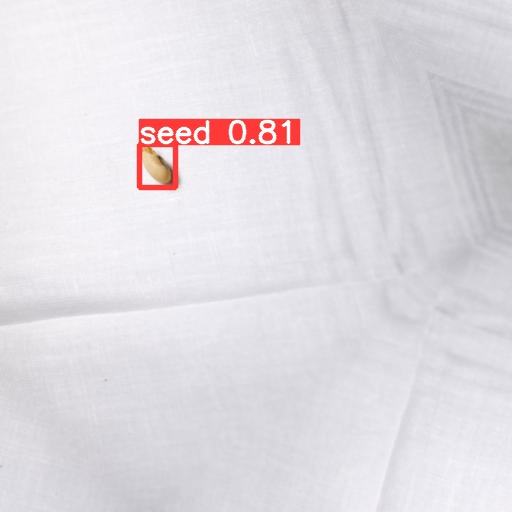

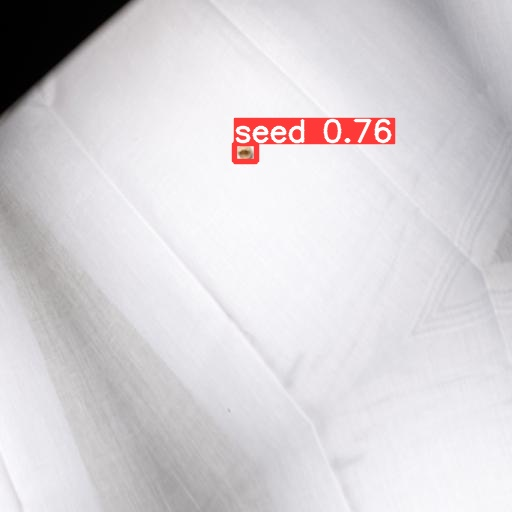

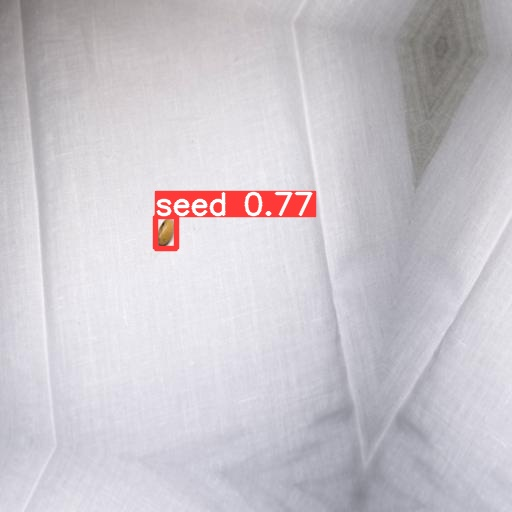

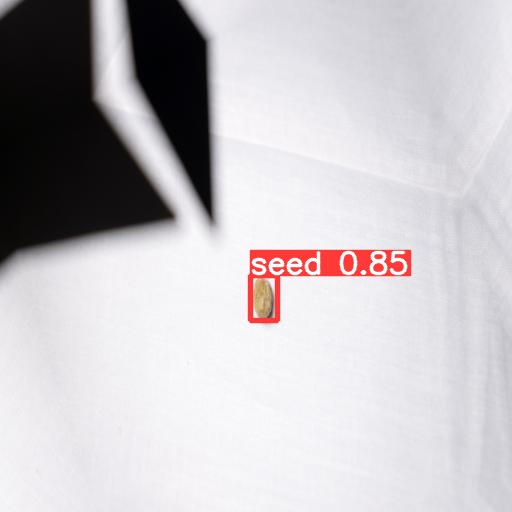

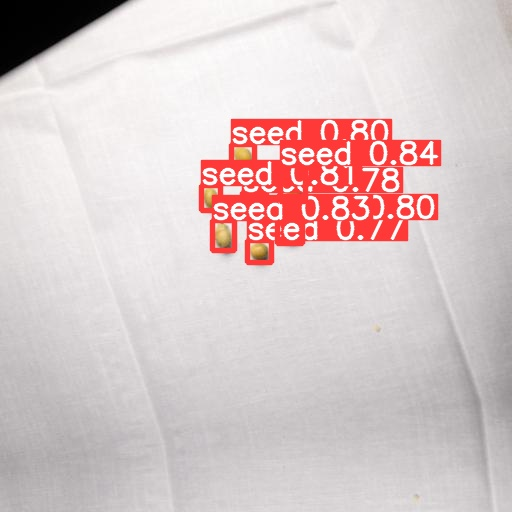

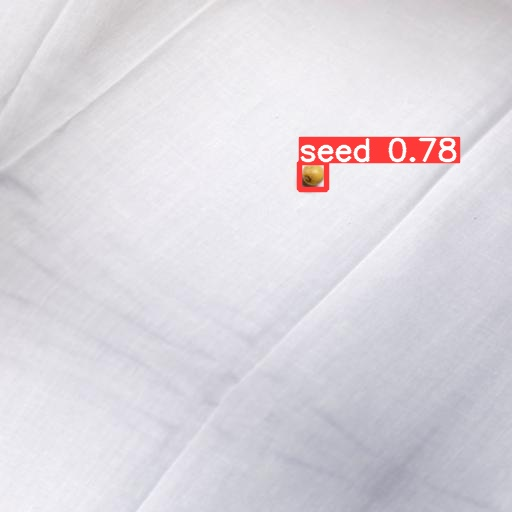

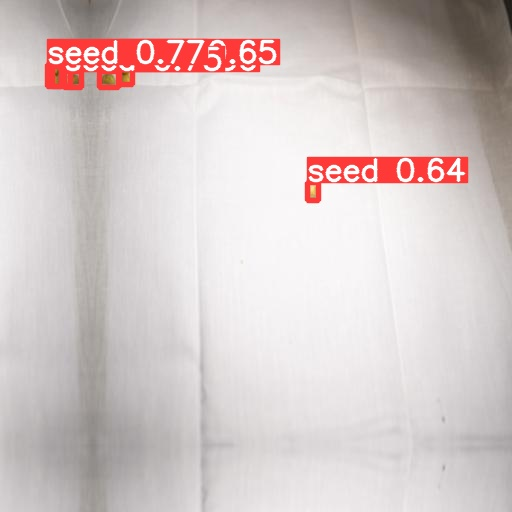

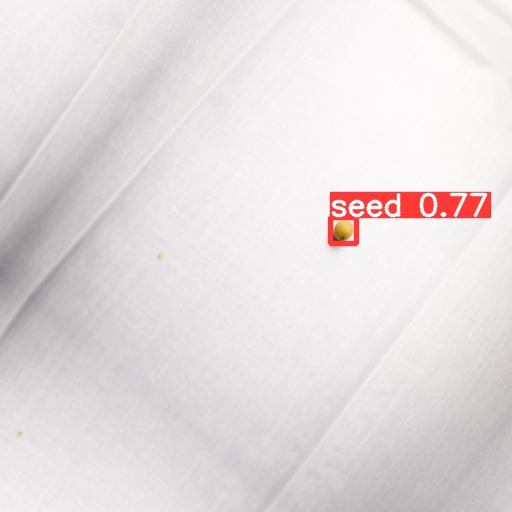

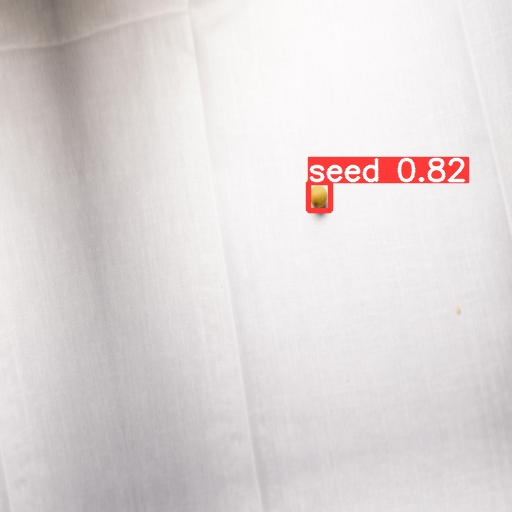

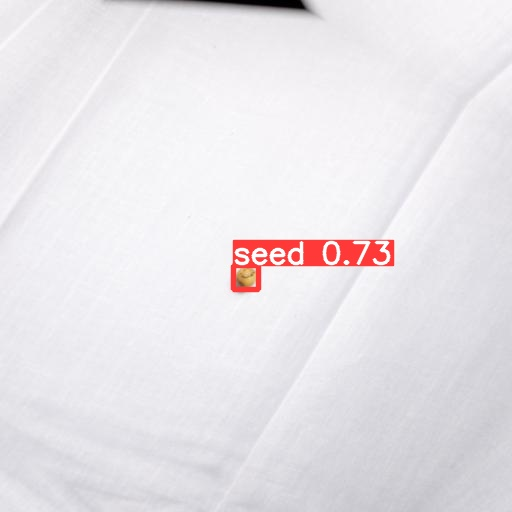

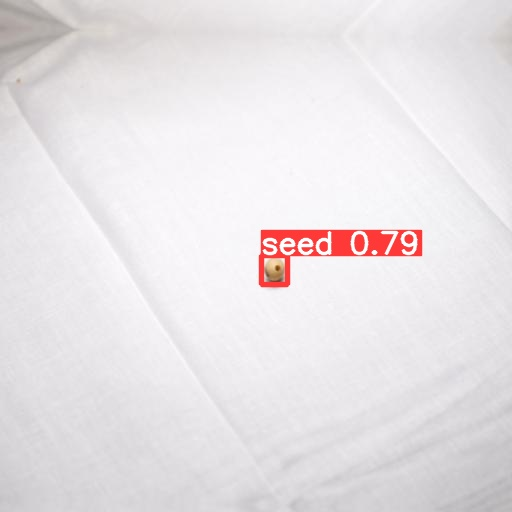

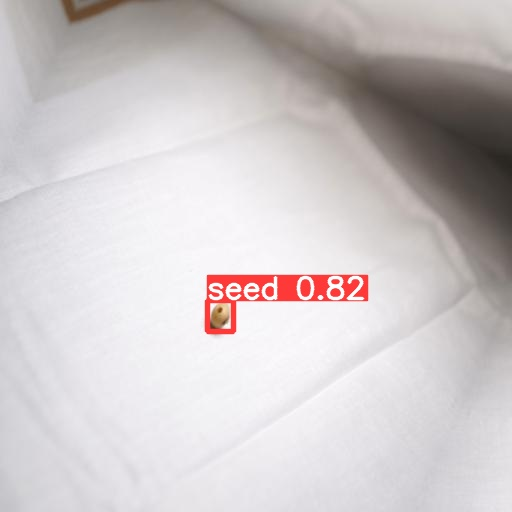

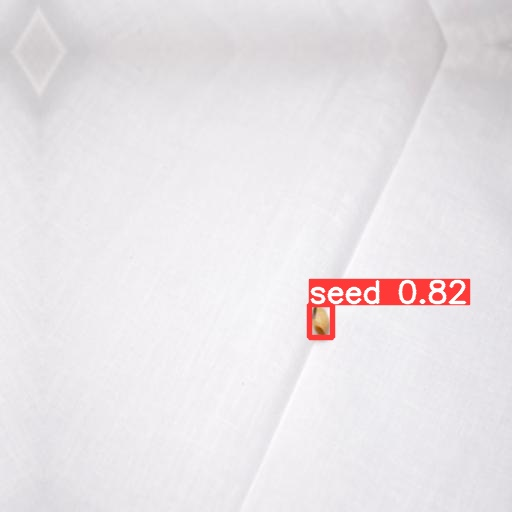

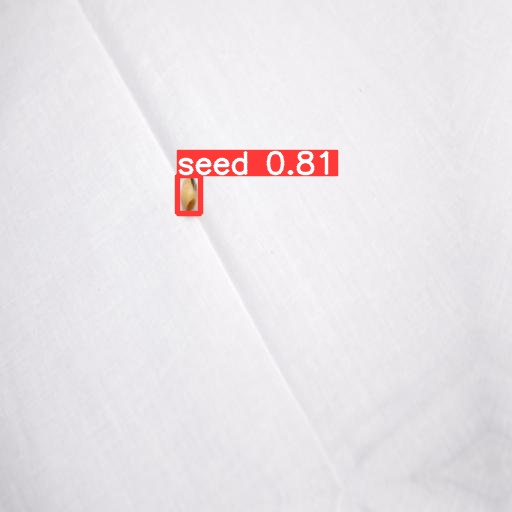

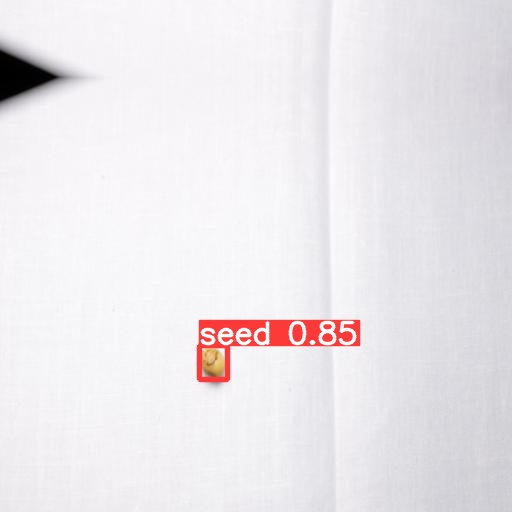

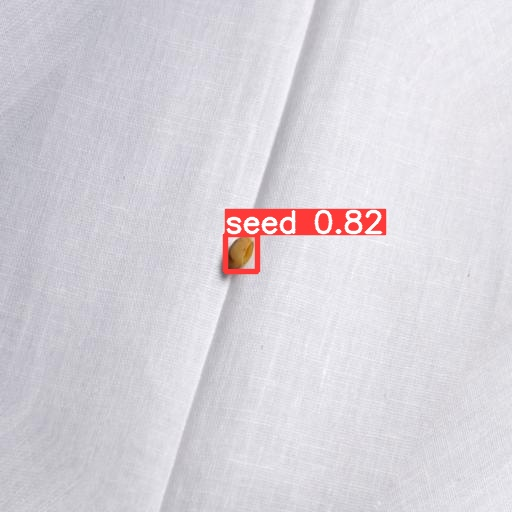

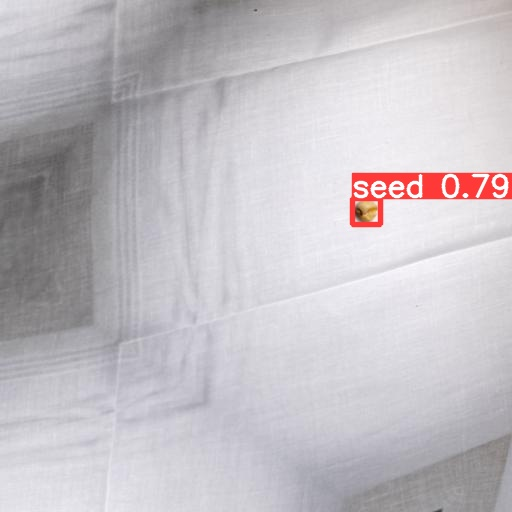

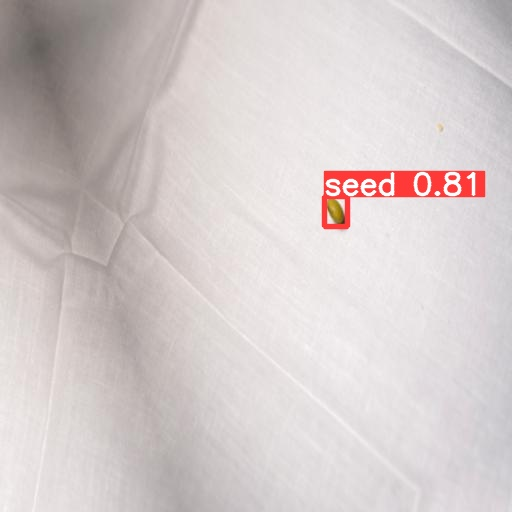

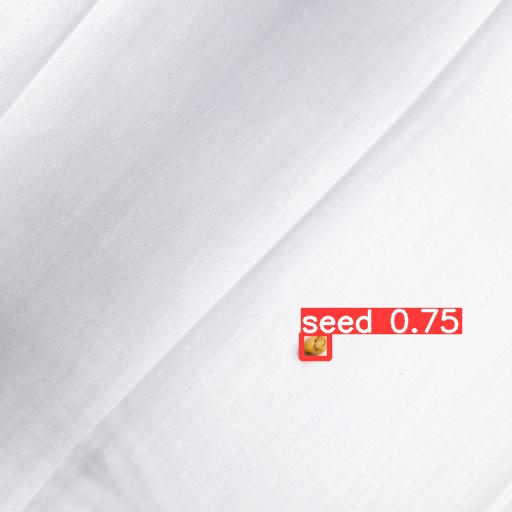

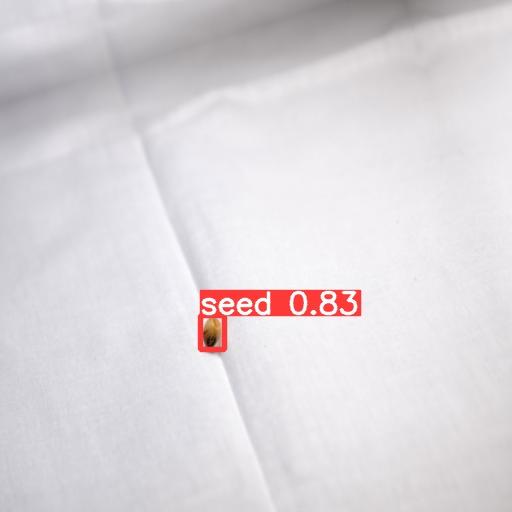

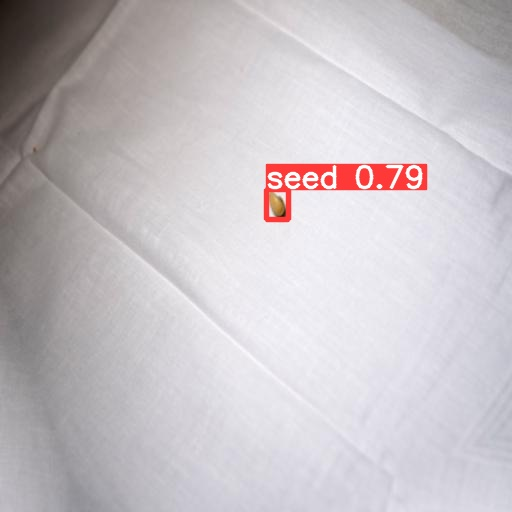

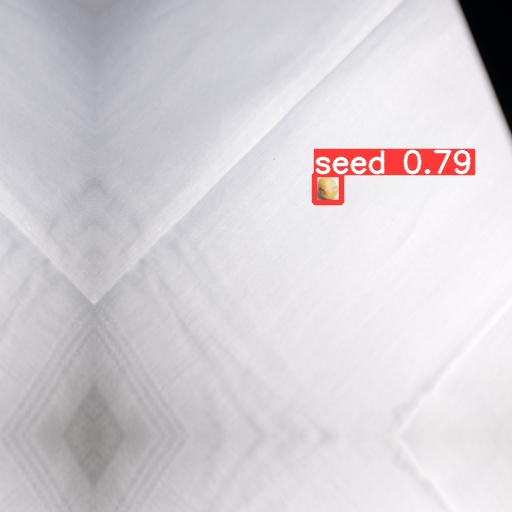

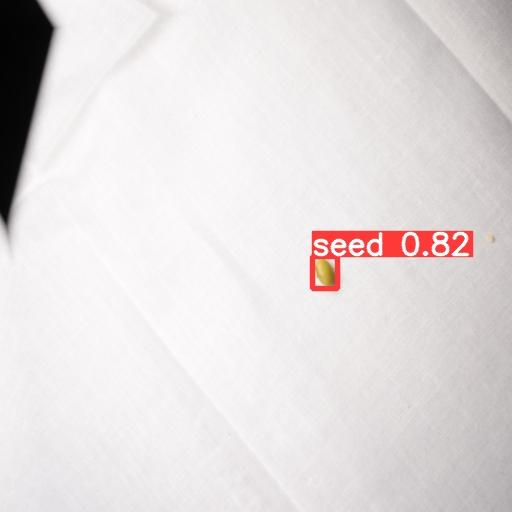

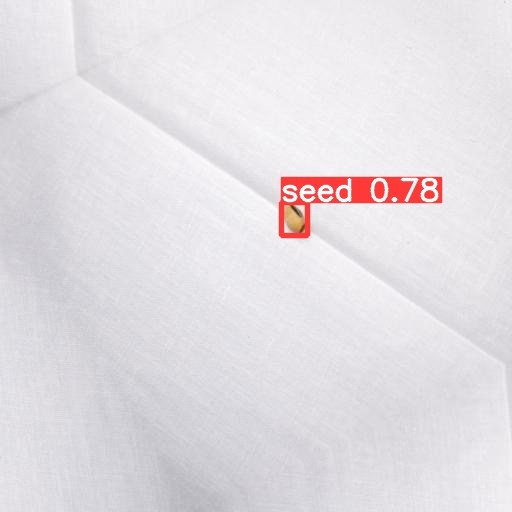

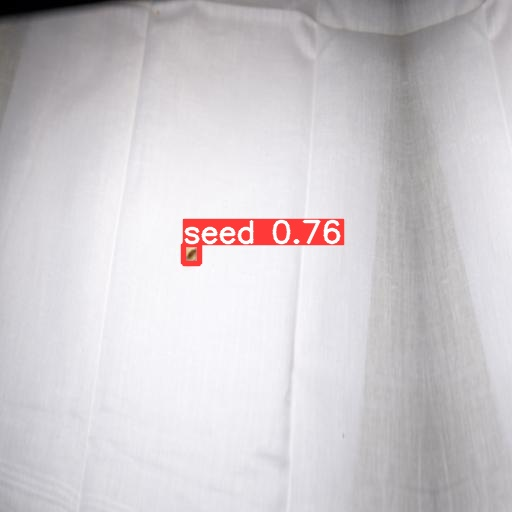

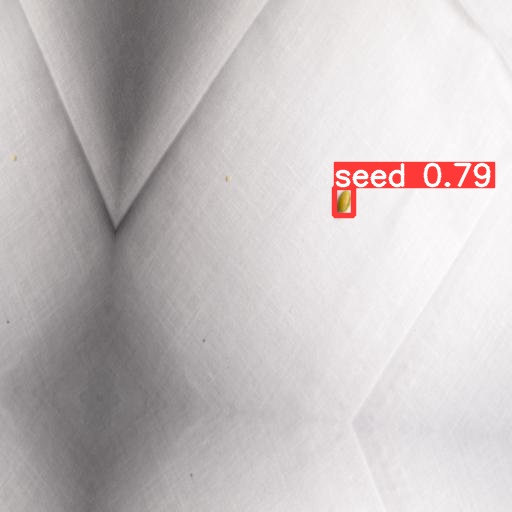

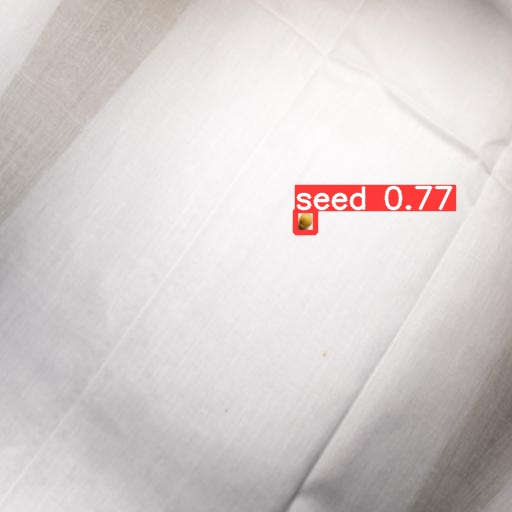

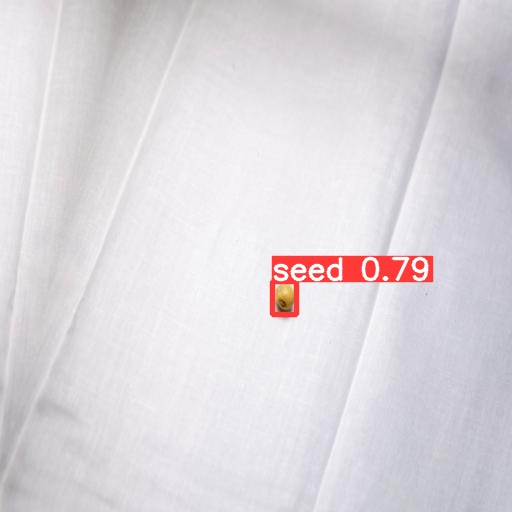

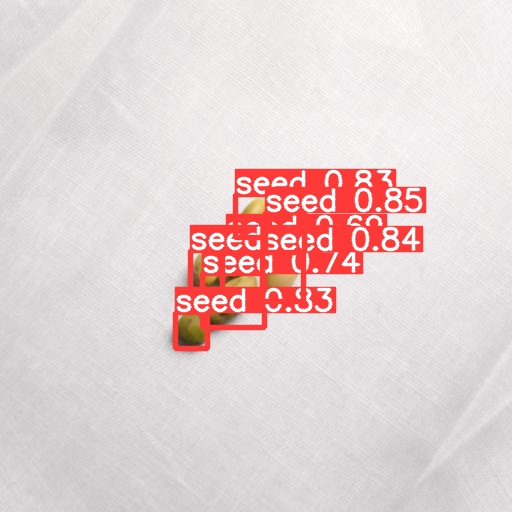

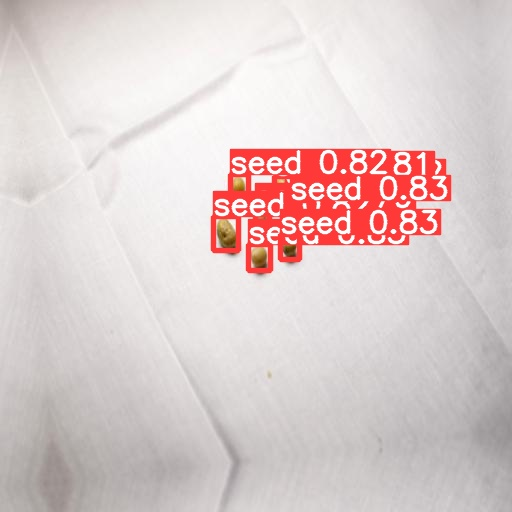

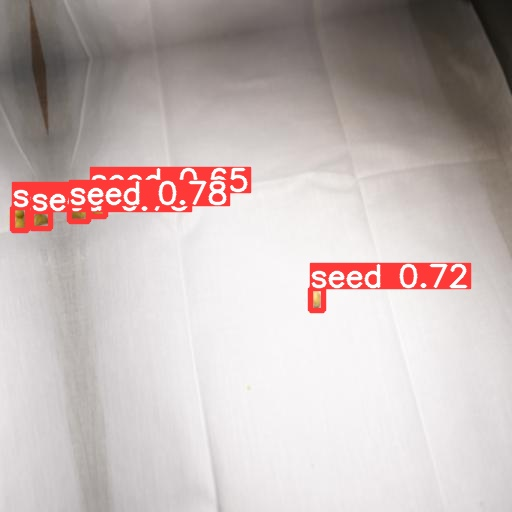

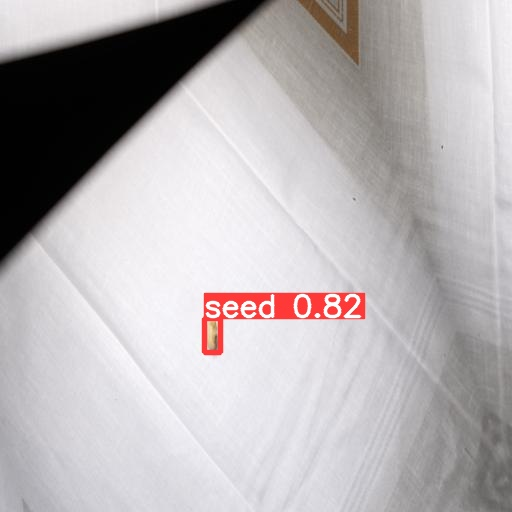

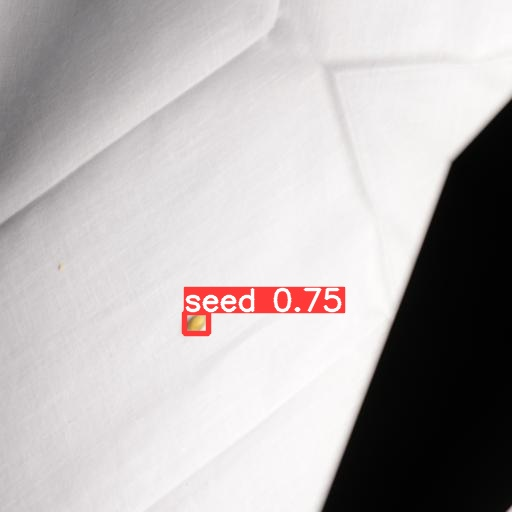

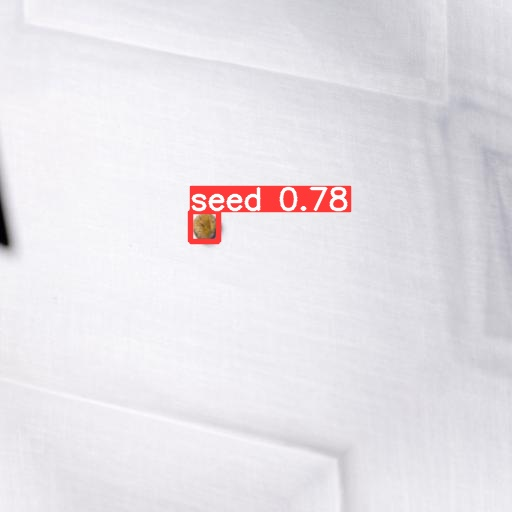

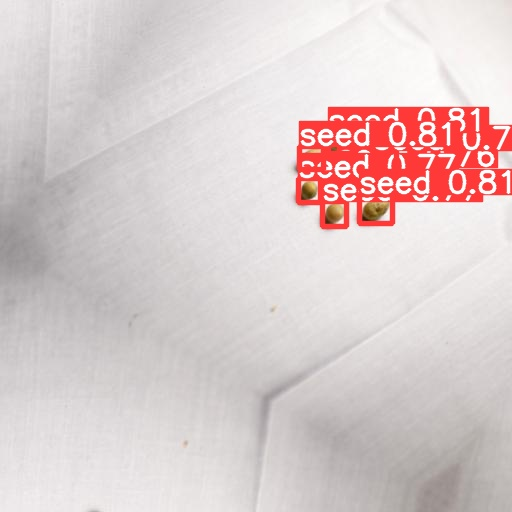

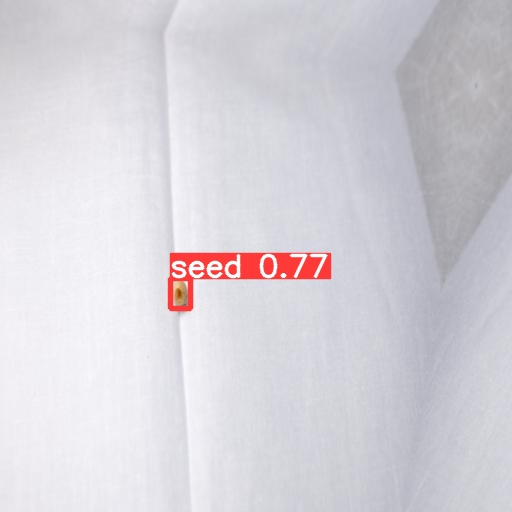

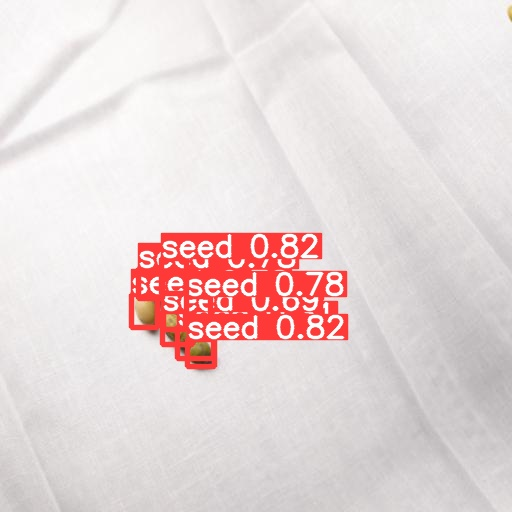

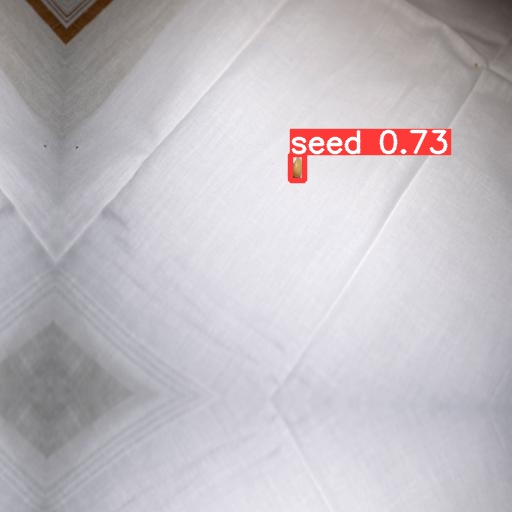

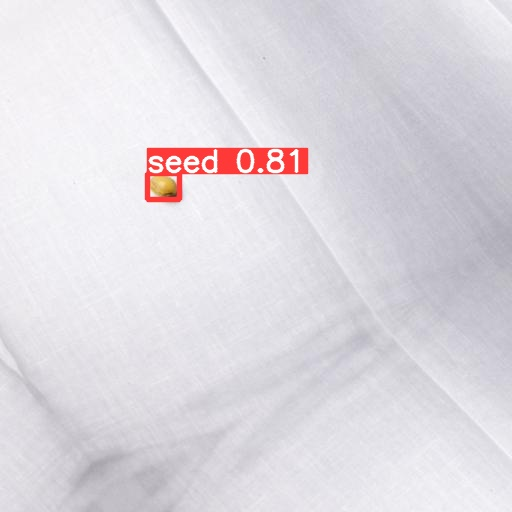

In [7]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i <40:
      display(Image(filename=imageName))
      print("\n")

In [ ]:
import os
import shutil

source_folder = r"E:\demos\files\reports\\"
destination_folder = r"E:\demos\files\account\\"

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)